In [1]:
import numpy as np
from scipy.spatial import ConvexHull,Delaunay
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Supposons un reseau simple : de type one_net d architecture 2 5 1
avec une activation relu : 2 5 (relu) 1 (relu)

In [9]:
#W1 = np.array([[2,0,-3,-1,2],[-1,0,2,1,-2]]).T
W1 = np.array([[-1,3,1,2,3,8],[1,0,-2,1,-3,1]]).T

W1.shape

(6, 2)

In [10]:
#b1 = np.array([2,0,-3,+4,2]).reshape(5,1)
b1 = np.array([2,-1,2,0,-2,2]).reshape(6,1)
b1.shape

(6, 1)

In [11]:
#W2= np.array([-1,-2,0,1,3]).reshape(1,-1)
W2= np.array([-3,2,1,-2,-1,-1]).reshape(1,-1)
W2.shape

(1, 6)

In [12]:
#b2 = np.array([2])
b2 = np.array([0])
b2.shape

(1,)

In [13]:
def decompose(w):
    return (w+abs(w))/2,(-w+abs(w))/2
def G1(x):
    return decompose(W1)[1].dot(x)
def H1(x):
    return decompose(W1)[0].dot(x)+b1
def F1(x):
    return np.maximum(G1(x),H1(x))
def NU1(x):
    return F1(x)-G(x)

In [19]:
PG1 = np.concatenate((decompose(W1)[1],0*b1.reshape(-1,1)),axis=1)
PH1 = np.concatenate((decompose(W1)[0],b1.reshape(-1,1)),axis=1)
PF1 = np.stack((PG1,PH1),axis=1)

In [20]:
PF1,PF1.shape

(array([[[ 1.,  0.,  0.],
         [ 0.,  1.,  2.]],
 
        [[ 0.,  0.,  0.],
         [ 3.,  0., -1.]],
 
        [[ 0.,  2.,  0.],
         [ 1.,  0.,  2.]],
 
        [[ 0.,  0.,  0.],
         [ 2.,  1.,  0.]],
 
        [[ 0.,  3.,  0.],
         [ 3.,  0., -2.]],
 
        [[ 0.,  0.,  0.],
         [ 8.,  1.,  2.]]]), (6, 2, 3))

In [25]:
PF1[0] * decompose(W2)[1][0]

ValueError: operands could not be broadcast together with shapes (2,3) (6,) 

In [23]:
H2_PF1 = np.zeros((5,2,3)) 
for i in range(5): 
    H2_PF1[i]= PF1[i] * decompose(W2)[1][0][i]
H2_PG1 = np.zeros((5,2,3)) 
for i in range(5): 
    H2_PG1[i]= PG1[i] * decompose(W2)[0][0][i]
G2_PF1 = np.zeros((5,2,3)) 
for i in range(5): 
    G2_PF1[i]= PF1[i] * decompose(W2)[0][0][i]
G2_PG1 = np.zeros((5,2,3)) 
for i in range(5): 
    G2_PG1[i]= PG1[i] * decompose(W2)[1][0][i]

In [17]:
H2 = []
for i in range(6):
    if decompose(W2)[1][0][i] !=0:
        H2.append(PF1[i] * decompose(W2)[1][0][i])
        print('f',i+1,decompose(W2)[1][0][i])
    else:
        H2.append(PG1[i] * decompose(W2)[0][0][i])
        print('g',i+1,decompose(W2)[0][0][i])

f 1 3.0
g 2 2.0
g 3 1.0
f 4 2.0
f 5 1.0
f 6 1.0


In [18]:
G2 = []
for i in range(6):
    if decompose(W2)[1][0][i] !=0:
        G2.append(PG1[i] * decompose(W2)[1][0][i])
        print('g',i+1,decompose(W2)[1][0][i])
    else:
        G2.append(PF1[i] * decompose(W2)[0][0][i])
        print('f',i+1,decompose(W2)[0][0][i])

g 1 3.0
f 2 2.0
f 3 1.0
g 4 2.0
g 5 1.0
g 6 1.0


In [12]:
def Mink(l):
    a = sep(l[0])
    liste = l[1:]
    t = len(a)
    for i in liste:
        print(t,'t')
        if len(i.shape) == 1:
            print('loop 1')
            p=[]
            for j in a:
                p.append(j+i)
                
            a = p[:]    
        else:
            print('loop 2')
            p = []
            t = t*i.shape[0]
            for k in range(i.shape[0]):
                for j in a:
                    p.append(j+i[k])
            
            a = p[:] 
        
    print(len(a),t)
                
    return a
            


In [13]:
def clean(l):
    a=[]
    for i in l:
        if np.count_nonzero(i)>0:
            a.append(i)
            
    return a
            


In [14]:
def sep(el):
    a=[]
    if len(el.shape)==1:
        return [el]
    else :
        for k in range(el.shape[0]):
            a.append(el[k])
        return a
            
        
    

In [15]:
Mink(clean(G2))

1 t
loop 2
2 t
loop 2
4 t
loop 1
4 4


[array([3., 5., 0.]),
 array([ 9.,  5., -2.]),
 array([4., 3., 2.]),
 array([10.,  3.,  0.])]

In [16]:
Mink(clean(H2))

2 t
loop 1
2 t
loop 2
4 t
loop 2
8 8


[array([3., 5., 0.]),
 array([0., 8., 6.]),
 array([7., 7., 0.]),
 array([ 4., 10.,  6.]),
 array([ 6.,  2., -2.]),
 array([3., 5., 4.]),
 array([10.,  4., -2.]),
 array([7., 7., 4.])]

In [37]:
F2 = Mink(clean(H2))+ Mink(clean(G2))
F2

2 t
loop 1
2 t
loop 2
4 t
loop 2
8 8
1 t
loop 2
2 t
loop 2
4 t
loop 1
4 4


[array([3., 5., 0.]),
 array([0., 8., 6.]),
 array([7., 7., 0.]),
 array([ 4., 10.,  6.]),
 array([ 6.,  2., -2.]),
 array([3., 5., 4.]),
 array([10.,  4., -2.]),
 array([7., 7., 4.]),
 array([3., 5., 0.]),
 array([ 9.,  5., -2.]),
 array([4., 3., 2.]),
 array([10.,  3.,  0.])]

In [38]:
tupled_lst = set(map(tuple, F2))
lst = map(list, tupled_lst)
FF = list(set(map(tuple, F2)))
f3 = np.zeros((len(FF),3))
for i in range(len(FF)):
    f3[i,0]=FF[i][0]
    f3[i,1]=FF[i][1]
    f3[i,2]=FF[i][2]
f3,f3.shape

(array([[ 6.,  2., -2.],
        [ 3.,  5.,  4.],
        [ 3.,  5.,  0.],
        [10.,  4., -2.],
        [ 7.,  7.,  4.],
        [ 4.,  3.,  2.],
        [ 9.,  5., -2.],
        [10.,  3.,  0.],
        [ 0.,  8.,  6.],
        [ 7.,  7.,  0.],
        [ 4., 10.,  6.]]), (11, 3))

In [39]:
hull = ConvexHull(f3)

In [21]:
hull.simplices

array([[ 0,  7,  3],
       [ 4,  7,  3],
       [ 5,  0,  7],
       [ 2,  5,  8],
       [ 2,  5,  0],
       [ 1,  5,  8],
       [ 1,  4,  7],
       [ 1,  5,  7],
       [ 6,  0,  3],
       [ 6,  2,  0],
       [ 6,  9,  2],
       [ 1,  4, 10],
       [ 1, 10,  8],
       [ 9, 10,  8],
       [ 9,  2,  8],
       [ 6,  4, 10],
       [ 6,  4,  3],
       [ 6,  9, 10]], dtype=int32)

In [22]:
p2 = f3[list(hull.vertices)]
p2

array([[ 6.,  2., -2.],
       [ 3.,  5.,  4.],
       [ 3.,  5.,  0.],
       [10.,  4., -2.],
       [ 7.,  7.,  4.],
       [ 4.,  3.,  2.],
       [ 9.,  5., -2.],
       [10.,  3.,  0.],
       [ 0.,  8.,  6.],
       [ 7.,  7.,  0.],
       [ 4., 10.,  6.]])

In [23]:
p = np.array([[ 4.,  7.,  0.],
       [ 6.,  5., -0.],
       [ 1.,  3.,  0.],])

t = np.array([[ 4.,  7.,  1.],
       [ 6.,  5., 1.],
       [ 1.,  3.,  1.]])

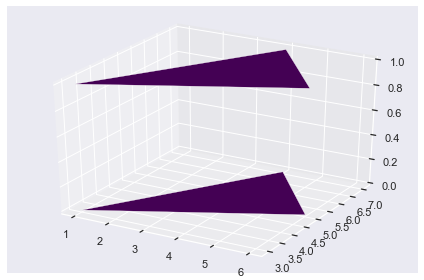

In [24]:
fig = plt.figure() # For plotting
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(p[:,0], p[:,1], p[:,2],cmap='viridis', linewidth=0.3)
ax.plot_trisurf(t[:,0], t[:,1], t[:,2],cmap='viridis', linewidth=0.3)

#ax.view_init(elev=0, azim=100)
fig.tight_layout()

In [25]:
hull.simplices

array([[ 0,  7,  3],
       [ 4,  7,  3],
       [ 5,  0,  7],
       [ 2,  5,  8],
       [ 2,  5,  0],
       [ 1,  5,  8],
       [ 1,  4,  7],
       [ 1,  5,  7],
       [ 6,  0,  3],
       [ 6,  2,  0],
       [ 6,  9,  2],
       [ 1,  4, 10],
       [ 1, 10,  8],
       [ 9, 10,  8],
       [ 9,  2,  8],
       [ 6,  4, 10],
       [ 6,  4,  3],
       [ 6,  9, 10]], dtype=int32)

In [27]:
def hyp(simplices,points):
    
    e = [ppp(f3,i)*1 for i in range(simplices.shape[0])]
    c=0
    for s in simplices:
        p = list(s)
        p.append(s[0])
        #if a[c]==0:
        #if d[c]==1:
        if e[c]==1:
            for k in range(3):
                x=[points[p[k]][0],points[p[k+1]][0]]
                y=[points[p[k]][1],points[p[k+1]][1]]
                plt.plot(x,y,marker = 'o')
        c+=1
    plt.show()
        

In [28]:
def ppp(f,i):
    l = np.zeros((f.shape[0]+1,f.shape[1]))
    a = ConvexHull(f)
    b = f[a.simplices[i]]
    c = np.mean(b,axis=0)
    d = np.cross(b[1]-b[0],b[2]-b[0])
    
    for k in range(f.shape[0]):
        l[k]=f[k]
    l[-1]=c + 0.001*d
    
    e = ConvexHull(l)
    g = f.shape[0] in list(e.vertices)
    gg = d[2]>0
    
    if gg * g ==1 or gg+g == 0:
        return True
    return False

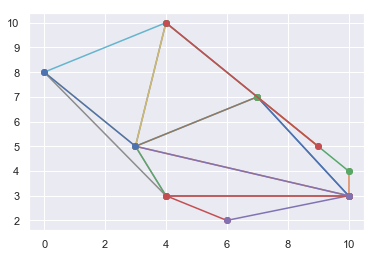

In [29]:
hyp(hull.simplices,f3)

In [30]:
hull.simplices.shape

(18, 3)

In [157]:
FF = list(set(map(tuple,  Mink(clean(G2)))))
g3 = np.zeros((len(FF),3))
for i in range(len(FF)):
    g3[i,0]=FF[i][0]
    g3[i,1]=FF[i][1]
    g3[i,2]=FF[i][2]
g3,g3.shape

1 t
loop 2
2 t
loop 2
4 t
loop 1
4 4


(array([[10.,  3.,  0.],
        [ 9.,  5., -2.],
        [ 4.,  3.,  2.],
        [ 3.,  5.,  0.]]), (4, 3))

In [42]:
FF = list(set(map(tuple,  Mink(clean(H2)))))
h3 = np.zeros((len(FF),3))
for i in range(len(FF)):
    h3[i,0]=FF[i][0]
    h3[i,1]=FF[i][1]
    h3[i,2]=FF[i][2]
h3,h3.shape

2 t
loop 1
2 t
loop 2
4 t
loop 2
8 8


(array([[ 6.,  2., -2.],
        [ 3.,  5.,  4.],
        [ 3.,  5.,  0.],
        [10.,  4., -2.],
        [ 7.,  7.,  4.],
        [ 0.,  8.,  6.],
        [ 7.,  7.,  0.],
        [ 4., 10.,  6.]]), (8, 3))

In [159]:
h3h = ConvexHull(h3)

In [160]:
g3g = ConvexHull(g3)

QhullError: qhull precision warning: 
The initial hull is narrow (cosine of min. angle is 1.0000000000000000).
Is the input lower dimensional (e.g., on a plane in 3-d)?  Qhull may
produce a wide facet.  Options 'QbB' (scale to unit box) or 'Qbb' (scale
last coordinate) may remove this warning.  Use 'Pp' to skip this warning.
See 'Limitations' in qh-impre.htm.
QH6114 qhull precision error: initial simplex is not convex. Distance=-2.2e-16

While executing:  | qhull i Qt
Options selected for Qhull 2015.2.r 2016/01/18:
  run-id 1973370077  incidence  Qtriangulate  _pre-merge  _zero-centrum
  _max-width  7  Error-roundoff 1.4e-14  _one-merge 9.6e-14
  _near-inside 4.8e-13  Visible-distance 2.7e-14  U-coplanar-distance 2.7e-14
  Width-outside 5.5e-14  _wide-facet 1.6e-13  _narrow-hull  0

precision problems (corrected unless 'Q0' or an error)
      1 flipped facets

The input to qhull appears to be less than 3 dimensional, or a
computation has overflowed.

Qhull could not construct a clearly convex simplex from points:
- p2(v3):     4     3     2
- p1(v2):     9     5    -2
- p0(v1):    10     3     0
- p3(v0):     3     5     0

The center point is coplanar with a facet, or a vertex is coplanar
with a neighboring facet.  The maximum round off error for
computing distances is 1.4e-14.  The center point, facets and distances
to the center point are as follows:

center point      6.5        4        0

facet p1 p0 p3 distance= -4.4e-16
facet p2 p0 p3 distance= -4.4e-16
facet p2 p1 p3 distance= -4.4e-16
facet p2 p1 p0 distance= -4.4e-16

These points either have a maximum or minimum x-coordinate, or
they maximize the determinant for k coordinates.  Trial points
are first selected from points that maximize a coordinate.

The min and max coordinates for each dimension are:
  0:         3        10  difference=    7
  1:         3         5  difference=    2
  2:        -2         2  difference=    4

If the input should be full dimensional, you have several options that
may determine an initial simplex:
  - use 'QJ'  to joggle the input and make it full dimensional
  - use 'QbB' to scale the points to the unit cube
  - use 'QR0' to randomly rotate the input for different maximum points
  - use 'Qs'  to search all points for the initial simplex
  - use 'En'  to specify a maximum roundoff error less than 1.4e-14.
  - trace execution with 'T3' to see the determinant for each point.

If the input is lower dimensional:
  - use 'QJ' to joggle the input and make it full dimensional
  - use 'Qbk:0Bk:0' to delete coordinate k from the input.  You should
    pick the coordinate with the least range.  The hull will have the
    correct topology.
  - determine the flat containing the points, rotate the points
    into a coordinate plane, and delete the other coordinates.
  - add one or more points to make the input full dimensional.


[4 0 3]
[4 0 1]
[4 7 5]
[4 1 5]


ValueError: x and y arrays must consist of at least 3 unique points

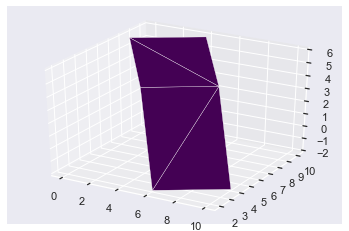

In [45]:
fig = plt.figure() # For plotting
ax = fig.add_subplot(111, projection='3d')
for s in h3h.simplices:
    p2 = h3[s]
    ax.plot_trisurf(p2[:,0], p2[:,1], p2[:,2],cmap='viridis', linewidth=0.3)
    print(s)
ax.view_init(elev=0, azim=0)
fig.tight_layout()

In [68]:
import mpl_toolkits.mplot3d as a3

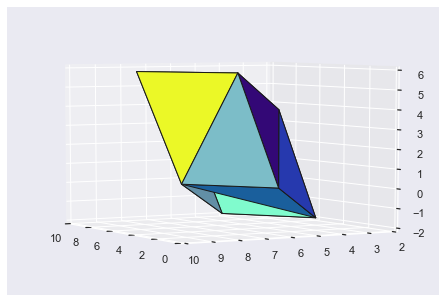

In [112]:
import matplotlib.colors as colors
import pylab as pl
import scipy as sp

min_=np.min(h3,axis=0)
max_=np.max(h3,axis=0)
ax = a3.Axes3D(pl.figure())
for s in h3h.simplices:
    p2 = h3[s]
    tri = a3.art3d.Poly3DCollection([p2])
    tri.set_color(colors.rgb2hex(sp.rand(3)))
    tri.set_edgecolor('k')
    ax.add_collection3d(tri)
ax.set_xlim3d(min_[0], max_[0])
ax.set_ylim3d(min_[1],max_[1])
ax.set_zlim3d(min_[2],max_[2])
ax.view_init(elev=5, azim=150)
pl.show()

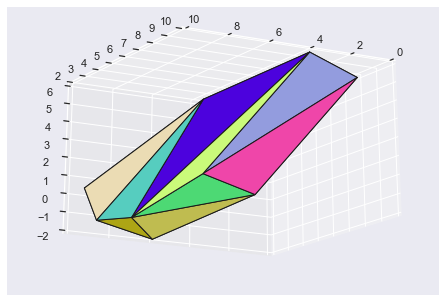

In [152]:
import matplotlib.colors as colors
import pylab as pl
import scipy as sp

min_=np.min(f3,axis=0)
max_=np.max(f3,axis=0)
ax = a3.Axes3D(pl.figure())
for s in hull.simplices:
    p2 = f3[s]
    tri = a3.art3d.Poly3DCollection([p2])
    tri.set_color(colors.rgb2hex(sp.rand(3)))
    tri.set_edgecolor('k')
    ax.add_collection3d(tri)
ax.set_xlim3d(min_[0], max_[0])
ax.set_ylim3d(min_[1],max_[1])
ax.set_zlim3d(min_[2],max_[2])
ax.view_init(elev=-20, azim=60)
pl.show()

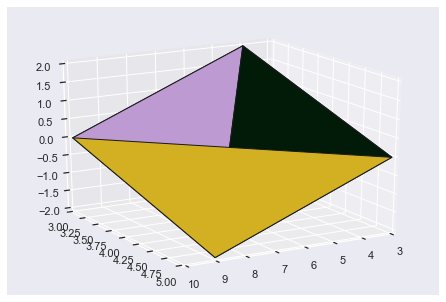

In [198]:
import matplotlib.colors as colors
import pylab as pl
import scipy as sp

min_=np.min(g3,axis=0)
max_=np.max(g3,axis=0)
ax = a3.Axes3D(pl.figure())

p2 = g3[np.array([0,1,2])]
tri = a3.art3d.Poly3DCollection([p2])
tri.set_color(colors.rgb2hex(sp.rand(3)))
tri.set_edgecolor('k')
ax.add_collection3d(tri)

p2 = g3[np.array([1,2,3])]
tri = a3.art3d.Poly3DCollection([p2])
tri.set_color(colors.rgb2hex(sp.rand(3)))
tri.set_edgecolor('k')
ax.add_collection3d(tri)

p2 = g3[np.array([2,3,0])]
tri = a3.art3d.Poly3DCollection([p2])
tri.set_color(colors.rgb2hex(sp.rand(3)))
tri.set_edgecolor('k')
ax.add_collection3d(tri)

p2 = g3[np.array([3,0,1])]
tri = a3.art3d.Poly3DCollection([p2])
tri.set_color(colors.rgb2hex(sp.rand(3)))
tri.set_edgecolor('k')
ax.add_collection3d(tri)

ax.set_xlim3d(min_[0], max_[0])
ax.set_ylim3d(min_[1],max_[1])
ax.set_zlim3d(min_[2],max_[2])
ax.view_init(elev=20, azim=60)
pl.show()

In [183]:
p2

array([[ 9.,  5., -2.],
       [ 7.,  7.,  0.],
       [ 4., 10.,  6.]])

In [209]:
np.linalg.det(gg3)

4.55191440096315e-15

In [207]:
gg3=np.ones((4,4))
for i in range(4):
    for j in range(3):
        gg3[i,j]=g3[i,j]
gg3    

array([[10.,  3.,  0.,  1.],
       [ 9.,  5., -2.,  1.],
       [ 4.,  3.,  2.,  1.],
       [ 3.,  5.,  0.,  1.]])

In [214]:
{'f1.weight': np.array([[ 1.1702000e+00,  1.9960000e-01],
        [-5.7159996e-01, -2.3000001e-03],
        [-5.4499999e-02, -2.6080000e-01],
        [-2.0999999e-03, -1.1590999e+00],
        [-2.1840000e-01,  9.8379999e-01],
        [-2.9040000e-01,  4.8599999e-02],
        [ 0.0000000e+00, -0.0000000e+00],
        [ 6.4330000e-01,  3.9999999e-04],
        [ 1.3880000e-01, -4.0649998e-01],
        [-8.2690001e-01, -1.0060000e-01]]),
 'f1.bias': np.array([-1.6380000e-01, -2.7999999e-03, -6.6149998e-01, -3.4469998e-01,
        -2.8009999e-01, -6.3749999e-01, -1.9999999e-04, -2.6130000e-01,
         4.9999997e-04, -7.0989996e-01]),
 'f2.weight': np.array([[ 0.46289998,  0.0669    ,  0.2631    ,  1.2672    ,  1.1229    ,
         -0.2333    , -0.        ,  1.3639    ,  0.6024    ,  3.6285    ]])
 'f2.bias': np.array([-0.648])}

SyntaxError: invalid syntax (<ipython-input-214-80c8e03caa79>, line 16)

In [ ]:
1.1702000e+00,  1.9960000e-01],
        [-5.7159996e-01, -2.3000001e-03],
        [-5.4499999e-02, -2.6080000e-01],
        [-2.0999999e-03, -1.1590999e+00],
        [-2.1840000e-01,  9.8379999e-01],
        [-2.9040000e-01,  4.8599999e-02],
        [ 0.0000000e+00, -0.0000000e+00],
        [ 6.4330000e-01,  3.9999999e-04],
        [ 1.3880000e-01, -4.0649998e-01],
        [-8.2690001e-01, -1.0060000e-01]]